# Лабораторная работа №4

Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.

2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.

3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.

4. Обучите следующие модели:
- одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
- SVM;
- дерево решений.

5. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.

6. Постройте график, показывающий важность признаков в дереве решений.

7. Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.


## Импорт библиотек

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Загрузка датасета
Источник: [Diabetes Prediction](https://www.kaggle.com/datasets/saurabh00007/diabetescsv)

Pregnancies – число беременностей;

Glucose – концентрация глюкозы в плазме крови;

BloodPressure – дистолическое давление крови;

SkinThickness – толщина кожи трицепса;

Insulin – содержания инсулина в крови;

BMI – индекс массы тела;

DiabetesPedigreeFunction – показатель функции генетического диабета;

Age – возраст;

Outcome – целевая переменная, где 0 – нет диабета, 1 – есть.

In [67]:
data = pd.read_csv("diabetes_dataset.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Первичный анализ датасета

In [68]:
data.isnull().sum() # --> нет пропусков в данных

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [69]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [70]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [71]:
data['Outcome'].value_counts() # --> нет значительного "перевеса" м/у 0 (нет диабета) и 1 (есть диабет)

Outcome
0    500
1    268
Name: count, dtype: int64

In [72]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


<Axes: >

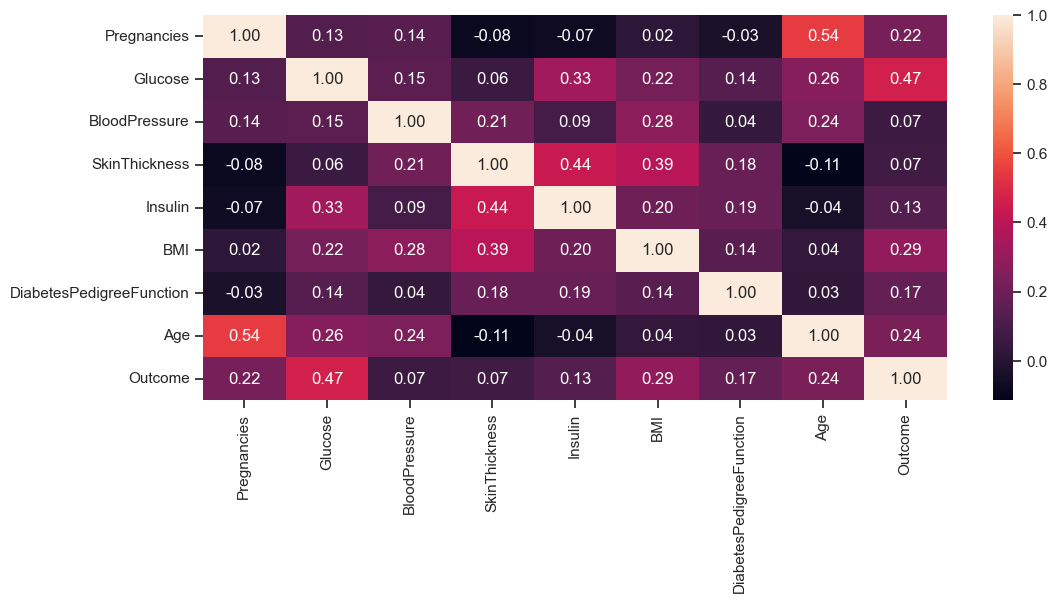

In [73]:
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

## Разделение выборки

In [74]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 10) 

## Масштабирование данных
Масштабирование предполагает изменение диапазона измерения величины.

In [75]:
scaler = StandardScaler()

In [76]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Обучение  моделей

### Логистическая регрессия

In [77]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(random_state=10)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(random_state=10)

### SVM - Метод опорных векторов

In [78]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=10)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=10)

### Дерево решений

In [79]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(random_state=10)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [80]:
from sklearn.model_selection import  GridSearchCV

parameters={'max_depth':range(3,30)}
clf = GridSearchCV(DecisionTreeClassifier(random_state=10), parameters)
clf.fit(X_train,y_train)
dt_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.7572837531654006 {'max_depth': 5}


## Оценка качества моделей

### Основные метрики

**Accuracy**  
Процент (долю в диапазоне от 0 до 1) правильно определенных классов. 

**Precision**  
$precision = \frac{TP}{TP+FP}$  
Доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.

**Recall**  
$recall = \frac{TP}{TP+FN}$  
Доля верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

**F1-мера**  
$F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [82]:
# Логистическая регрессия
y_pred_logistic_regression = logistic_regression_model.predict(X_test)

logistic_regression_accuracy = accuracy_score(y_test, y_pred_logistic_regression)
logistic_regression_precision = precision_score(y_test, y_pred_logistic_regression, average="weighted")
logistic_regression_recall = recall_score(y_test, y_pred_logistic_regression, average="weighted")
logistic_regression_f1 = f1_score(y_test, y_pred_logistic_regression, average="weighted")

In [83]:
# Метод опорных векторов
y_pred_svm = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

In [84]:
# Дерево решений
y_pred_decision_tree = decision_tree_model.predict(X_test)

decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
decision_tree_precision = precision_score(y_test, y_pred_decision_tree, average='weighted')
decision_tree_recall = recall_score(y_test, y_pred_decision_tree, average='weighted')
decision_tree_f1 = f1_score(y_test, y_pred_decision_tree, average='weighted')

In [85]:
# Дерево решений
y_pred_decision_tree = dt_model.predict(X_test)

dt_model_accuracy = accuracy_score(y_test, y_pred_decision_tree)
dt_model_precision = precision_score(y_test, y_pred_decision_tree, average='weighted')
dt_model_recall = recall_score(y_test, y_pred_decision_tree, average='weighted')
dt_model_f1 = f1_score(y_test, y_pred_decision_tree, average='weighted')

In [86]:
from tabulate import tabulate

data = [
    ['accuracy', round(logistic_regression_accuracy, 3), round(svm_accuracy, 3), round(decision_tree_accuracy, 3), round(dt_model_accuracy, 3)],
    ['precision', round(logistic_regression_precision, 3), round(svm_precision, 3), round(decision_tree_precision, 3), round(dt_model_precision, 3)],
    ['recall', round(logistic_regression_recall, 3), round(svm_recall, 3), round(decision_tree_recall, 3), round(dt_model_recall, 3)],
    ['f1', round(logistic_regression_f1, 3), round(svm_f1, 3), round(decision_tree_f1, 3), round(dt_model_f1, 3)]
]

headers = ['Метрика \ модель', 'Logistic Regression', 'SVM', 'Decision tree', 'Decision tree (depth = 5)']

print(tabulate(data, headers=headers, tablefmt="grid"))

+--------------------+-----------------------+-------+-----------------+-----------------------------+
| Метрика \ модель   |   Logistic Regression |   SVM |   Decision tree |   Decision tree (depth = 5) |
+====================+=======================+=======+=================+=============================+
| accuracy           |                 0.812 | 0.825 |           0.649 |                       0.734 |
+--------------------+-----------------------+-------+-----------------+-----------------------------+
| precision          |                 0.809 | 0.823 |           0.662 |                       0.74  |
+--------------------+-----------------------+-------+-----------------+-----------------------------+
| recall             |                 0.812 | 0.825 |           0.649 |                       0.734 |
+--------------------+-----------------------+-------+-----------------+-----------------------------+
| f1                 |                 0.809 | 0.82  |           0.654 | 

<>:10: SyntaxWarning: invalid escape sequence '\ '
<>:10: SyntaxWarning: invalid escape sequence '\ '
/var/folders/ms/11njc1lj2wx8dcsxd1nqx_800000gn/T/ipykernel_1655/2865813157.py:10: SyntaxWarning: invalid escape sequence '\ '
  headers = ['Метрика \ модель', 'Logistic Regression', 'SVM', 'Decision tree', 'Decision tree (depth = 5)']


### Матрица ошибок
Количество верно и ошибочно классифицированных данных, представленное в виде матрицы.

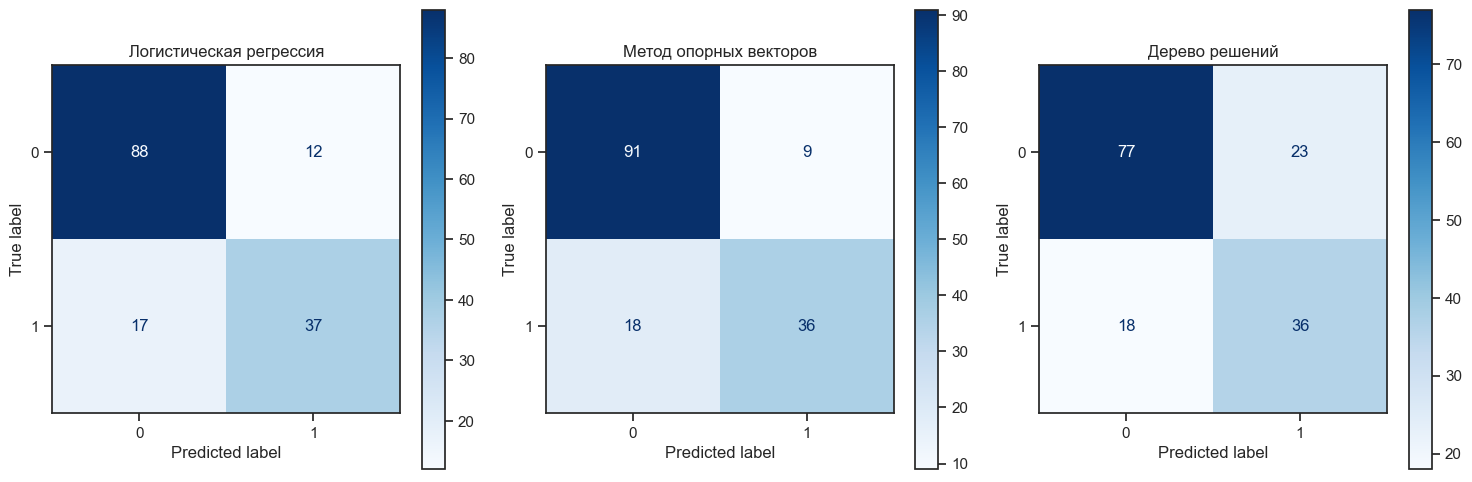

In [87]:
cm_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)
cm_svm = confusion_matrix(y_test, y_pred_svm)  
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree) 

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_logistic_regression)
disp1.plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title('Логистическая регрессия')

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp2.plot(ax=axes[1], cmap=plt.cm.Blues)
axes[1].set_title('Метод опорных векторов')

disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_decision_tree)
disp3.plot(ax=axes[2], cmap=plt.cm.Blues)
axes[2].set_title('Дерево решений')

plt.tight_layout()
plt.show()

### ROC-кривая и ROC AUC
 Основана на вычислении следующих характеристик:
 
 $TPR = \frac{TP}{TP+FN}$ - True Positive Rate, откладывается по оси ординат. Совпадает с recall.
 
 $FPR = \frac{FP}{FP+TN}$ - False Positive Rate, откладывается по оси абсцисс. Показывает какую долю из объектов отрицательного класса алгоритм предсказал неверно.
 
 В случае бинарной классификации матрица ошибок выглядит следующим образом:
 
 | Предсказанное/истинное значение | $y=1$ | $y=0$ |
 | --- | --- | --- |
 | $\hat{y}=1$ | True Positive (TP) | False Positive (FP) |
 | $\hat{y}=0$ | False Negative (FN) | True Negative (TN) |
 
 $TPR$ содержит в знаменателе количество истинных 1.
 
 $FPR$ содержит в знаменателе количество истинных 0.

In [88]:
from sklearn.metrics import roc_curve, roc_auc_score

# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label, average, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

Идеальная ROC-кривая проходит через точки (0,0)-(0,1)-(1,1), то есть через верхний левый угол графика.

Чем сильнее отклоняется кривая от верхнего левого угла графика, тем хуже качество классификации.

В качестве количественной метрики используется площадь под кривой - ROC AUC (Area Under the Receiver Operating Characteristic Curve). Чем ниже проходит кривая тем меньше ее площадь и тем хуже качество классификатора.

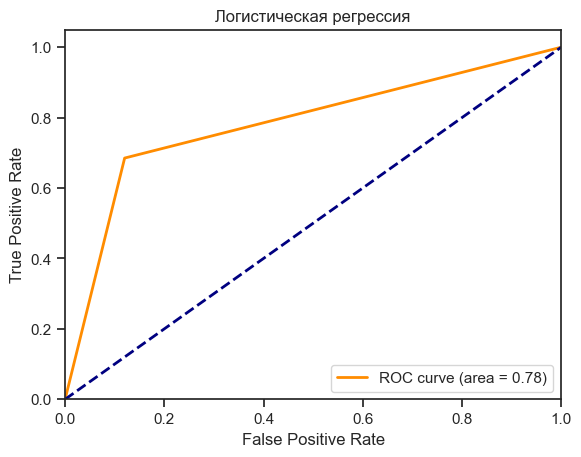

In [89]:
draw_roc_curve(y_test, y_pred_logistic_regression, pos_label=1, average='micro', title="Логистическая регрессия")

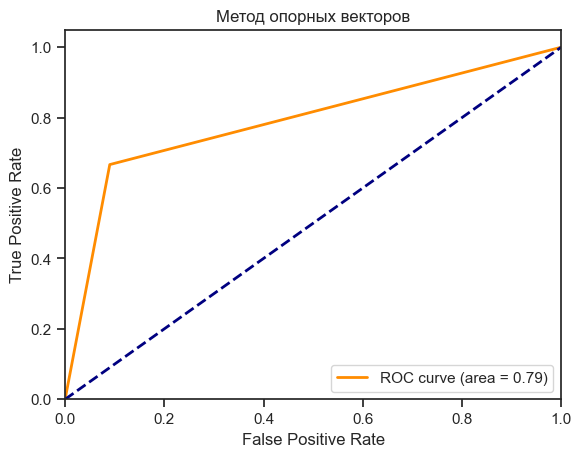

In [90]:
draw_roc_curve(y_test, y_pred_svm, pos_label=1, average='micro', title="Метод опорных векторов")

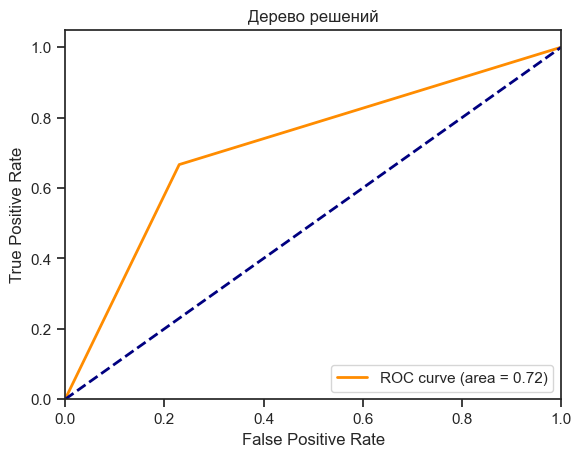

In [91]:
draw_roc_curve(y_test, y_pred_decision_tree, pos_label=1, average='micro', title="Дерево решений")

### График важности признаков в дереве решений

In [92]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(10,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    ax.set_ylim(0, max(data) * 1.1)
    
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.01, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

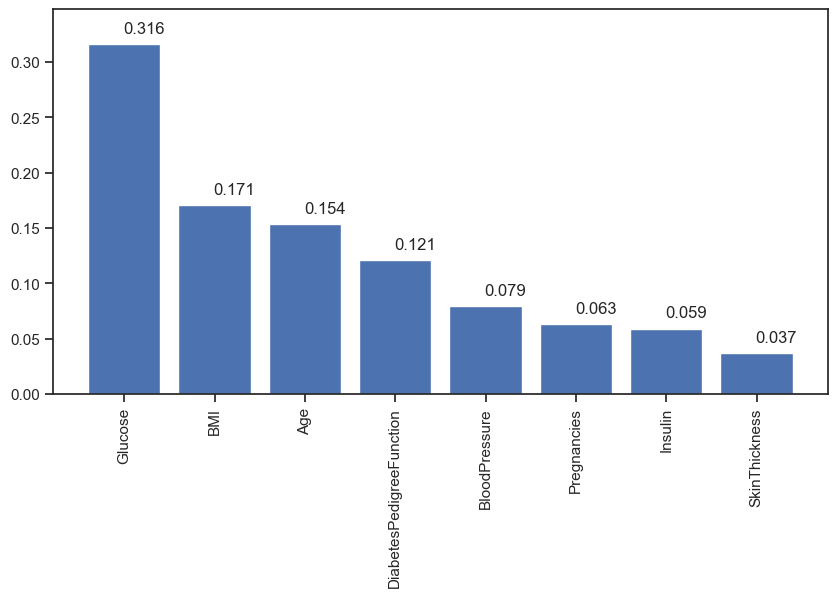

In [93]:
iris_tree_cl_fl, iris_tree_cl_fd  = draw_feature_importances(decision_tree_model, X)

### Визуализация дерева решений

In [94]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(decision_tree_model, feature_names=list(X.columns))
HTML('<pre>' + tree_rules + '</pre>')

In [95]:
tree_rules = export_text(dt_model, feature_names=list(X.columns))
HTML('<pre>' + tree_rules + '</pre>')

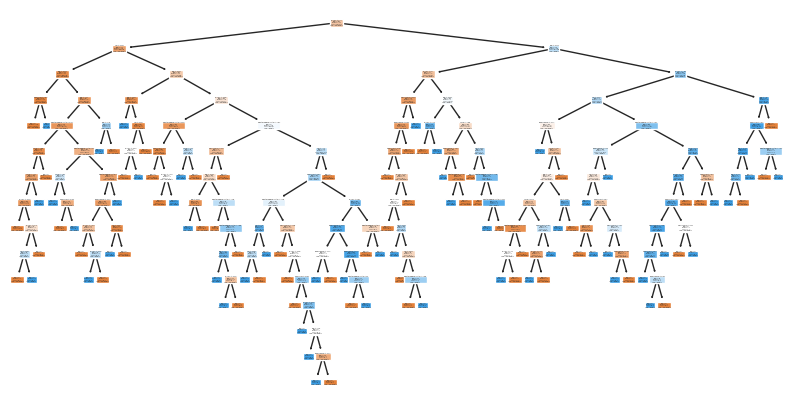

In [96]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,5))
plot_tree(decision_tree_model, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'], filled=True)
plt.show()

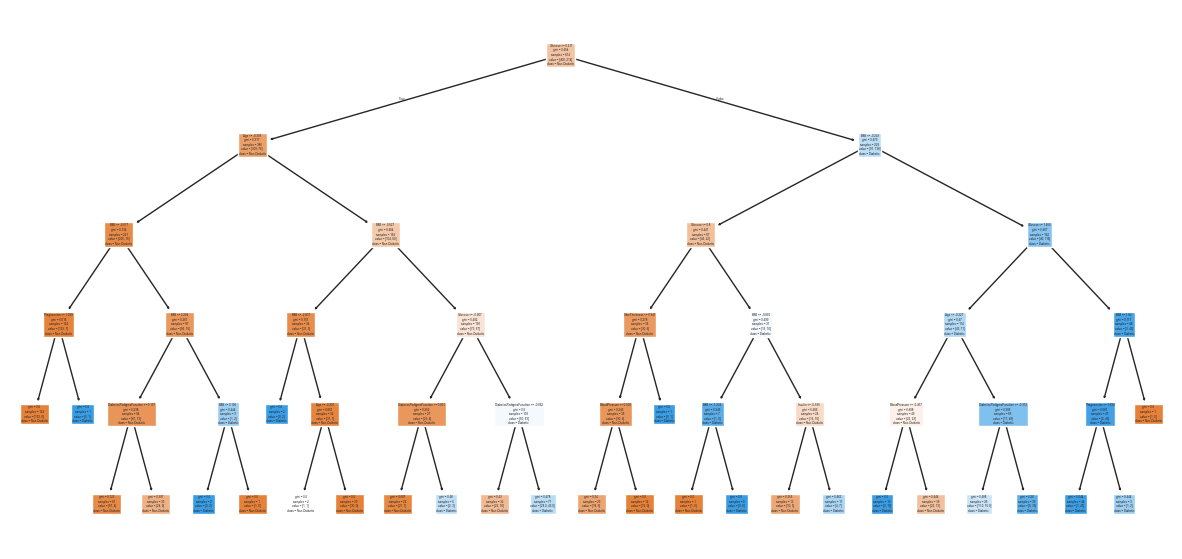

In [97]:
plt.figure(figsize=(15,7))
plot_tree(dt_model, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'], filled=True)
plt.show()

Если в датасете
- много категориальных признаков (целевой - бинарный) - дерево решений
- много числовых признаков (целевой - бинарный) - метод опорных векторов
- числовые признаки (целевой - числовой) - линейная регрессия